<a href="https://colab.research.google.com/github/BrayanArismendi1997/Curso-IA/blob/main/KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# K-Nearest Neighbors (K-NN)
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Dataset

dataset = pd.read_csv('/content/drive/MyDrive/DS/IA/Regresiòn lineal simple, mùltiple y logistica/Social_Network_Ads.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Defino una distancia que interesa, como la Euclidea
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
# Prediccion
y_pred = classifier.predict(X_test)

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

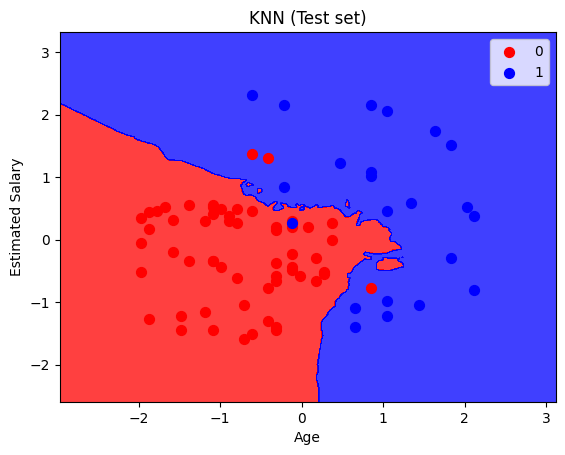

In [ ]:
### Visualization
# Frontera de decision
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Datos como series
y_test_s = pd.Series(y_test)
target_names=['0','1']

# Indices de los labels
idxPlus=y_test_s[y_test_s==0].index
idxMin=y_test_s[y_test_s==1].index

# Visualizacion de los puntos de datos
plt.scatter(X_test[idxPlus,0],X_test[idxPlus,1],c='r',s=50, label='0')
plt.scatter(X_test[idxMin,0],X_test[idxMin,1],c='b',s=50, label='1')

plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
